# HIDS-7006 Spring 2024 : Lab 8: Word Embeddings using Word2vec


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In this workshop, we will explore how to represent textual data for Machine Learning. In this first part we will explore the **Word embeddings** representation of enconding text to vectors

We specifically explore how to load, train word embeddings using the word2vec algorithm using a popular package called **Gensim**
More details about gensim can be found here: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


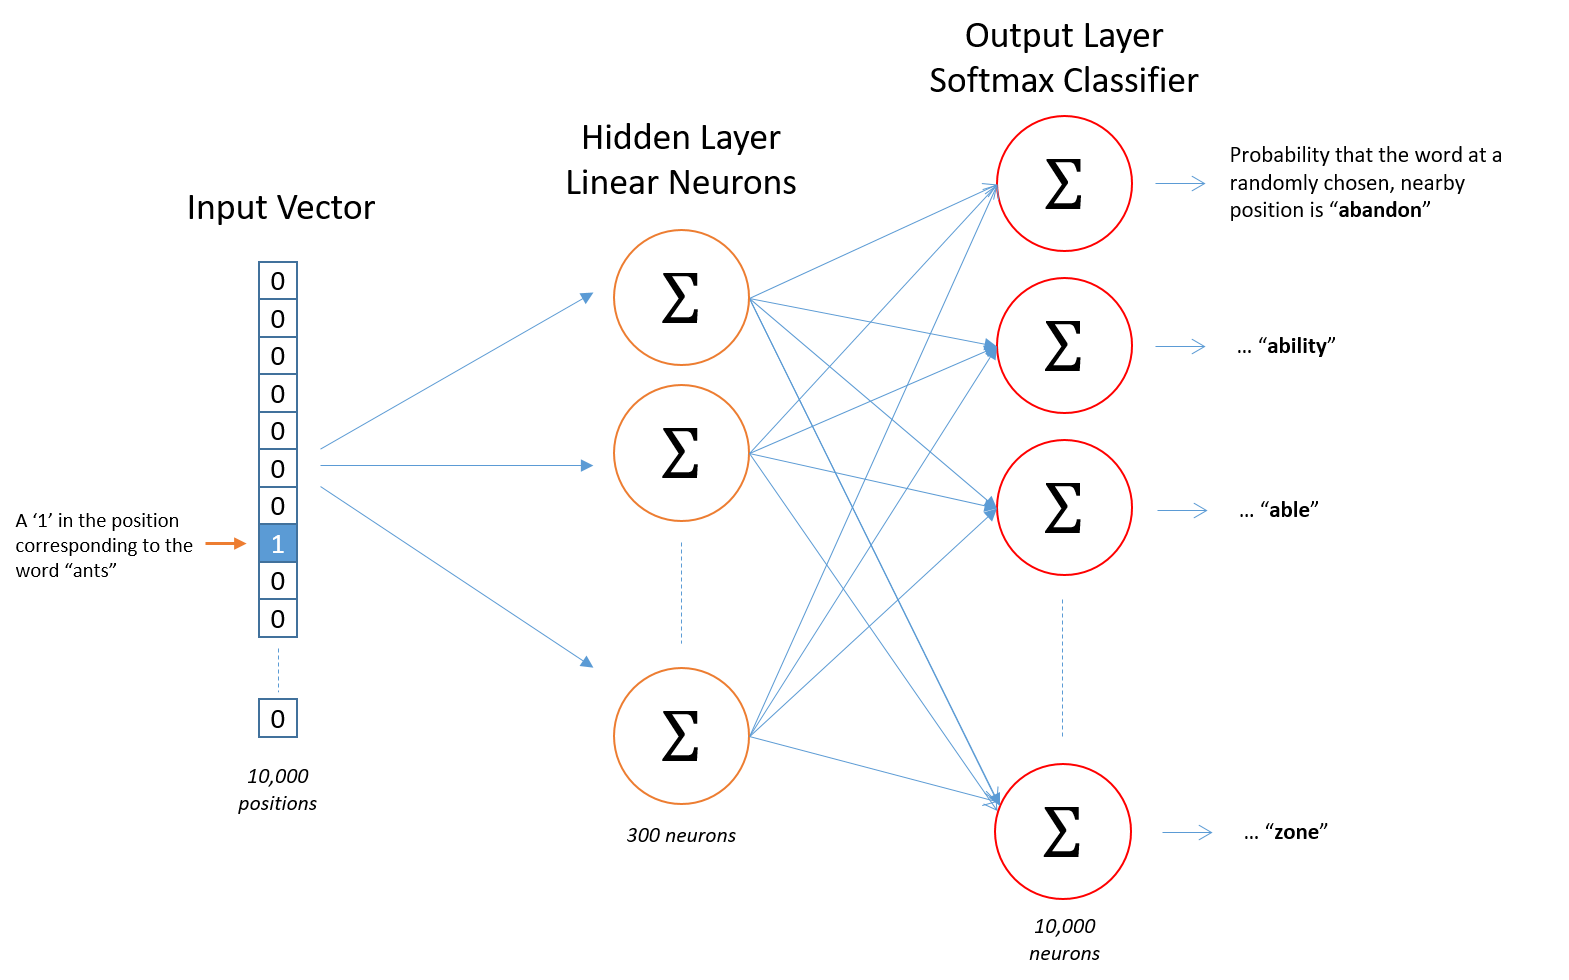

**Brief explanation**

The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model. For instance: "dog", "puppy" and "pup" are often used in similar situations, with similar surrounding words like "good", "fluffy" or "cute", and according to Word2Vec they will therefore share a similar vector representation.

From this assumption, Word2Vec can be used to find out the relations between words in a dataset, compute the similarity between them, or use the vector representation of those words as input for other applications such as text classification or clustering.The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model. For instance: "dog", "puppy" and "pup" are often used in similar situations, with similar surrounding words like "good", "fluffy" or "cute", and according to Word2Vec they will therefore share a similar vector representation.

From this assumption, Word2Vec can be used to find out the relations between words in a dataset, compute the similarity between them, or use the vector representation of those words as input for other applications such as text classification or clustering.

### Training word embeddings using Gensim

We will train word vectors/embeddings on our ADR corpus

Load dataset

In [ ]:
data_dir = "/content/drive/MyDrive/Work/HIDS_506_2024/Lecture8/data"

In [ ]:
ade_df = pd.read_csv(data_dir+"/ade_corpus_all.csv")

In [ ]:
print(ade_df.shape)
ade_df.head()

(20960, 3)


,pmid,sentence,label
0,10030778,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,"Immobilization, while Paget's bone disease was...",1
2,10048291,Unaccountable severe hypercalcemia in a patien...,1
3,10082597,METHODS: We report two cases of pseudoporphyri...,1
4,10082597,"Naproxen, the most common offender, has been a...",1


Training using a toy example:

In [ ]:
from gensim.models import Word2Vec

Sentences should be tokenized for training

In [ ]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

In [ ]:
sentences

[['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
 ['this', 'is', 'the', 'second', 'sentence'],
 ['yet', 'another', 'sentence'],
 ['one', 'more', 'sentence'],
 ['and', 'the', 'final', 'sentence']]

In [ ]:
# train model
model = Word2Vec(sentences, min_count=1)

Few Parameters:


*    size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
*    window: (default 5) The maximum distance between a target word and words around the target word.
*    min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
*    workers: (default 3) The number of threads to use while training.
*    sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).



In [ ]:
# summarize the loaded model
print(model)

Word2Vec<vocab=14, vector_size=100, alpha=0.025>


In [ ]:
model.wv.index_to_key

['sentence',
 'the',
 'is',
 'this',
 'final',
 'and',
 'more',
 'one',
 'another',
 'yet',
 'second',
 'word2vec',
 'for',
 'first']

In [ ]:
# summarize vocabulary
words = model.wv.index_to_key

In [ ]:
words

['sentence',
 'the',
 'is',
 'this',
 'final',
 'and',
 'more',
 'one',
 'another',
 'yet',
 'second',
 'word2vec',
 'for',
 'first']

In [ ]:
# access vector for one word
print(model.wv['sentence'])

[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e-03  2.46979

**train it on our ADE corpus**

**Note:** We do not need the label column to train word vecctors. Word2Vec is a "unsupervised" (sort of) algorithm that learns vectors by  building a fake classification task, which is to predict context words. Thus you only require a corpus of text to train your word vecctors.

In [ ]:
ade_df.head()

,pmid,sentence,label
0,10030778,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,"Immobilization, while Paget's bone disease was...",1
2,10048291,Unaccountable severe hypercalcemia in a patien...,1
3,10082597,METHODS: We report two cases of pseudoporphyri...,1
4,10082597,"Naproxen, the most common offender, has been a...",1


In [ ]:
sentences = ade_df['sentence'].values.tolist()

In [ ]:
sentences[:5]

['Intravenous azithromycin-induced ototoxicity.',
 "Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihydrotachysterol by rifampicin, could have led to increased calcium-release into the circulation.",
 'Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachysterol.',
 'METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.',
 'Naproxen, the most common offender, has been associated with a dimorphic clinical pattern: a PCT-like presentation and one simulating erythropoietic protoporphyria in the pediatric population.']

In [ ]:
len(sentences)

20960

In [ ]:
sentences[1]

Tokenize using nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenized_sents = [word_tokenize(sent.lower()) for sent in sentences]

In [ ]:
tokenized_sents[1]

['immobilization',
 ',',
 'while',
 'paget',
 "'s",
 'bone',
 'disease',
 'was',
 'present',
 ',',
 'and',
 'perhaps',
 'enhanced',
 'activation',
 'of',
 'dihydrotachysterol',
 'by',
 'rifampicin',
 ',',
 'could',
 'have',
 'led',
 'to',
 'increased',
 'calcium-release',
 'into',
 'the',
 'circulation',
 '.']

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [ ]:
cores

2

In [ ]:
# train model
model = Word2Vec(tokenized_sents, vector_size = 100, workers=cores)

In [ ]:
# summarize the loaded model
print(model)

Word2Vec<vocab=6470, vector_size=100, alpha=0.025>


In [ ]:
# summarize vocabulary
words = list(model.wv.index_to_key)

In [ ]:
len(words)

6470

In [ ]:
words[:100]

['.',
 'of',
 'the',
 ',',
 'and',
 'a',
 'in',
 'with',
 'to',
 'was',
 ')',
 '(',
 'is',
 'for',
 'patients',
 'patient',
 'after',
 'treatment',
 ':',
 'case',
 'this',
 'therapy',
 'an',
 'by',
 'be',
 'that',
 'we',
 'were',
 'report',
 'as',
 'on',
 'are',
 'developed',
 'been',
 'who',
 'or',
 'may',
 'had',
 'acute',
 'treated',
 'cases',
 'from',
 'not',
 'associated',
 'syndrome',
 'have',
 'disease',
 'two',
 'has',
 'during',
 'severe',
 'at',
 'drug',
 'clinical',
 'use',
 'which',
 'reported',
 'these',
 'renal',
 'following',
 'symptoms',
 'months',
 "'s",
 'but',
 'chemotherapy',
 'it',
 'one',
 'should',
 '%',
 'effects',
 'no',
 'other',
 'infection',
 'administration',
 '2',
 'three',
 'all',
 'can',
 'days',
 ';',
 'both',
 'chronic',
 'used',
 'diagnosis',
 'due',
 'first',
 'literature',
 'liver',
 'our',
 'presented',
 'failure',
 'woman',
 'showed',
 'she',
 '1',
 'he',
 'when',
 'years',
 'pulmonary',
 '3']

In [ ]:
wv = model.wv

In [ ]:
wv.get_vector("intravenous")

array([-1.0017279 ,  0.16624157,  0.49777398,  0.32753494, -0.36845434,
       -0.6336536 , -0.25354955,  1.1591269 , -0.6056424 , -0.7252819 ,
        0.12483024, -1.0095603 , -0.6607026 , -0.16863829,  0.13001935,
       -0.22055282, -0.13162538, -0.32353225, -0.73054755, -1.2052863 ,
        0.30908218,  0.6773617 ,  0.6459127 ,  0.02149159,  0.03911729,
        0.954304  , -0.29048663, -0.34723845,  0.29125383, -0.15627165,
        0.01153421,  0.05770805, -0.08942672, -1.1806556 ,  0.39294145,
        0.10357471,  0.23159991, -0.5493747 , -0.9929138 , -0.46766016,
        0.85044855, -1.2721033 , -0.5761542 ,  0.29242182,  0.4315843 ,
       -0.45885542, -0.27750406,  0.32220766,  0.27856758,  0.12822993,
        0.6201793 ,  0.25145182,  0.07094061,  0.13530287, -1.0838407 ,
       -0.46048585,  0.06526896, -0.9034314 , -0.31875917,  0.75502306,
       -0.152996  ,  0.74937385,  0.237335  ,  0.1706848 , -0.27513596,
        0.7264228 ,  0.6350694 ,  1.0785253 ,  0.25790858,  0.40

In [ ]:
wv.get_vector("intravenous").shape

(100,)

In [ ]:
wv.get_vector("disease")

array([-0.7627792 ,  0.18739437, -1.5105773 ,  0.22058547, -1.9015291 ,
       -0.5126743 ,  0.48465958,  0.7095231 , -0.42768902, -0.6685128 ,
        0.23342343, -1.0394293 ,  0.46810338,  0.52975756, -0.67151576,
       -0.2773104 ,  0.7837048 ,  0.0392863 ,  0.9067598 , -0.23006901,
       -0.5863268 ,  0.42779848,  0.21033238,  1.5749162 , -0.5201208 ,
       -0.7243317 ,  0.22716995, -0.24748035,  0.7299305 , -0.31819165,
       -0.7422993 , -0.43080205,  0.8007365 , -0.23031421, -1.317096  ,
        1.463107  , -0.30442187, -1.1964415 ,  0.0968661 , -0.8567459 ,
        1.2848866 , -0.15112948, -0.02673939, -0.47785148,  0.31650573,
        0.42321303, -0.536893  , -0.7932694 ,  0.02508571, -0.6227365 ,
       -0.52321297, -0.04287254,  0.6760274 , -0.05686099, -0.09806937,
        0.06806724,  0.2744048 ,  0.6639305 ,  0.12995197, -0.01716146,
       -0.25924203, -1.62535   , -0.02803133,  0.73413366, -0.01897048,
        0.6622386 , -0.76826376,  0.97065294, -0.3679348 , -0.21

**Get top most similar words in vocab**

In [ ]:
wv.most_similar('intravenous')

[('methylprednisolone', 0.9459210634231567),
 ('oral', 0.9449785351753235),
 ('high-dose', 0.9232162237167358),
 ('vecuronium', 0.9229279160499573),
 ('zoledronic', 0.9097812175750732),
 ('infusion', 0.9058835506439209),
 ('methotrexate', 0.9036741256713867),
 ('prednisolone', 0.9036473035812378),
 ('i.v', 0.9003772139549255),
 ('beta-1a', 0.8970826864242554)]

In [ ]:
wv.most_similar('fever')

[('rash', 0.9210330247879028),
 ('vomiting', 0.9191847443580627),
 ('abdominal', 0.9188374876976013),
 ('urticaria', 0.9154276251792908),
 ('dyspnea', 0.9053087830543518),
 ('confusion', 0.8988588452339172),
 ('progressive', 0.8976339101791382),
 ('nausea', 0.8922852277755737),
 ('chest', 0.888708770275116),
 ('eosinophilia', 0.8862895965576172)]

Most dissimilar

In [ ]:
wv.most_similar(negative='fever')

[('are', 0.04414675757288933),
 ('is', 0.005657358560711145),
 ('may', -0.009465333074331284),
 ('adverse', -0.01865297183394432),
 ('has', -0.035059791058301926),
 ('effects', -0.045817747712135315),
 ('side', -0.06718466430902481),
 ('have', -0.0701771005988121),
 ('can', -0.07772897183895111),
 ('should', -0.08478312194347382)]

**Similarity score**

In [ ]:
wv.similarity('fever', 'chills')

0.8617967

In [ ]:
wv.similarity('fever', 'that')

0.15379538

**Odd one out**

In [ ]:
wv.doesnt_match(["fever", "chills", "oral", "rash"])

'oral'

**Analogies**

man-> king : woman:??

In [ ]:
result = wv.most_similar(positive=['cancer', 'chills'], negative=['fever'])
print("{}: {:.4f}".format(*result[0]))

advanced: 0.8955


In [ ]:
result

[('advanced', 0.8955214023590088),
 ('breast', 0.8881043791770935),
 ('colorectal', 0.8612247705459595),
 ('nasopharyngeal', 0.8595889210700989),
 ('ovarian', 0.8498736619949341),
 ('prostate', 0.8440697193145752),
 ('undergoing', 0.8428229093551636),
 ('refractory', 0.830027163028717),
 ('cll', 0.8275541663169861),
 ('metastatic', 0.826435387134552)]

In [ ]:
def analogy(x1, x2, y1):
    result = wv.most_similar(positive=[y1, x2], negative=[x1])
    print(result)

In [ ]:
analogy("chills", "fever", "diabetes")

[('pain', 0.8573206663131714), ('lymphoma', 0.8551504611968994), ('diagnosed', 0.8476443886756897), ('arthritis', 0.8317356705665588), ('boy', 0.829940676689148), ('23-year-old', 0.8283237218856812), ('9-year-old', 0.8243285417556763), ('4-year-old', 0.8206914663314819), ('8-year-old', 0.8182839751243591), ('24-year-old', 0.814993143081665)]


This is a very small set. and hence the results are not very good for analogies. Typically word embeddings usinf word2vec are trained on millions on documents

### Loading a pre-trained word embeddings trained on a very large corpus
Glove6B is trained on wikipedia and news articles with 6B tokens, 400lk vocab

I will use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.

In [ ]:
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
glove_file = "/content/drive/MyDrive/Work/HIDS_506_2021/Workshops/Workshop6/data/embeddings/glove.6B.100d.txt"

In [ ]:
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

<ipython-input-48-2d6c96501ae7>:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [ ]:
wv = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:
wv.get_vector("obama").shape

(100,)

In [ ]:
wv.get_vector("obama")

array([-0.44413  ,  0.59188  ,  0.98472  , -0.058361 ,  0.6077   ,
       -0.68421  ,  0.019399 ,  0.099464 , -0.13403  ,  0.24832  ,
       -0.24049  , -0.35876  , -0.29002  , -0.39814  ,  0.02137  ,
       -0.25071  , -0.013359 , -0.044295 , -0.29525  , -0.64601  ,
        0.29299  , -0.37601  , -0.3124   , -0.1293   , -0.93938  ,
        0.20459  , -0.72762  ,  0.2271   ,  0.44782  , -0.48476  ,
        0.7424   ,  1.1035   ,  0.6844   ,  0.86386  , -0.22639  ,
        0.68557  , -0.64844  , -0.48585  , -0.18262  ,  1.3293   ,
       -1.4314   , -0.95057  ,  0.94967  ,  0.55113  , -0.84357  ,
       -0.73851  , -0.13937  , -0.0097541, -0.28226  , -0.89138  ,
        0.15243  , -0.2845   ,  0.84001  ,  1.0873   , -0.016641 ,
       -2.5264   ,  0.50699  , -0.52419  ,  0.40204  ,  0.14475  ,
       -0.51315  ,  0.097834 ,  0.47384  , -0.67161  ,  0.52199  ,
        0.50871  ,  0.29222  ,  0.90184  , -0.2625   , -0.097745 ,
        0.21947  ,  0.12971  , -0.96543  , -0.20776  ,  0.0093

In [ ]:
wv.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.896000325679779),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933662533760071),
 ('dole', 0.7851964831352234),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472624182701111)]

Coming back to analogies
`man-> king : woman:??`

In [ ]:
result = wv.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [ ]:
def analogy(x1, x2, y1):
    result = wv.most_similar(positive=[y1, x2], negative=[x1])
    #return result[0][0]
    return result

In [ ]:
analogy('japan', 'japanese', 'australia')

[('australian', 0.8923497796058655),
 ('zealand', 0.8012940883636475),
 ('british', 0.7840811610221863),
 ('australians', 0.6766527891159058),
 ('indian', 0.670796811580658),
 ('canadian', 0.6601305603981018),
 ('english', 0.6396120190620422),
 ('england', 0.6350405812263489),
 ('sydney', 0.6257352232933044),
 ('britain', 0.6175569295883179)]

In [ ]:
analogy('australia', 'beer', 'france')

[('champagne', 0.6480063796043396),
 ('wine', 0.6029773354530334),
 ('cognac', 0.599911093711853),
 ('drink', 0.596866250038147),
 ('perfume', 0.5843736529350281),
 ('drinks', 0.5787434577941895),
 ('vodka', 0.5771391987800598),
 ('beers', 0.563433051109314),
 ('anheuser', 0.5613827705383301),
 ('bourbon', 0.552852988243103)]

In [ ]:
analogy('tall', 'tallest', 'long')

[('longest', 0.7037105560302734),
 ('the', 0.6229448914527893),
 ('major', 0.6216300129890442),
 ('time', 0.6173370480537415),
 ('first', 0.616451621055603),
 ('since', 0.60569828748703),
 ('decade', 0.6019695997238159),
 ('busiest', 0.6005878448486328),
 ('its', 0.6004385352134705),
 ('part', 0.60023432970047)]

In [ ]:
analogy('good', 'fantastic', 'bad')

[('terrible', 0.7074226140975952),
 ('awful', 0.70609450340271),
 ('horrible', 0.6906466484069824),
 ('scary', 0.6802915334701538),
 ('weird', 0.6775556206703186),
 ('crazy', 0.6615544557571411),
 ('strange', 0.6522735953330994),
 ('dreadful', 0.6404813528060913),
 ('bizarre', 0.6389496326446533),
 ('incredible', 0.6321425437927246)]

In [ ]:
print(wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


##Visualization of embeddings

In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(16,16))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()

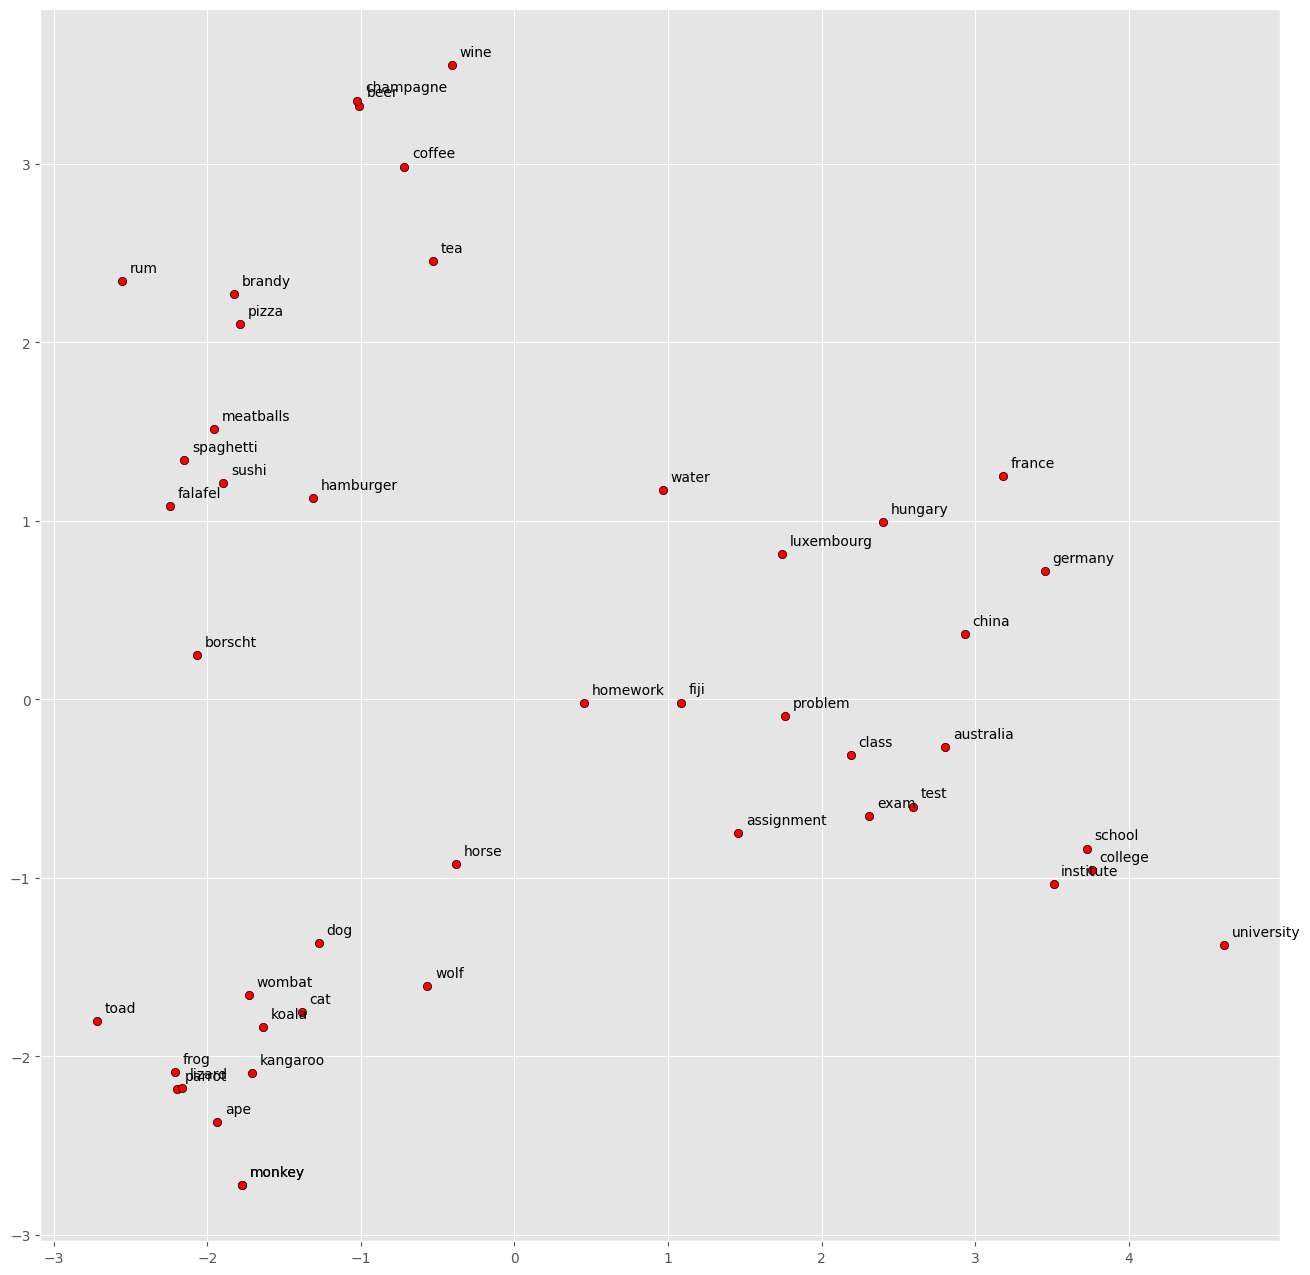

In [ ]:
display_pca_scatterplot(wv,
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

In [ ]:
wv.most_similar('nuclear')

[('atomic', 0.8345614075660706),
 ('weapons', 0.7992491126060486),
 ('missile', 0.7333793640136719),
 ('reactor', 0.727847158908844),
 ('iran', 0.7257774472236633),
 ('enrichment', 0.7181844711303711),
 ('proliferation', 0.7147133350372314),
 ('uranium', 0.7099131345748901),
 ('reactors', 0.7078331708908081),
 ('korea', 0.6898523569107056)]

## Vectors trained on millions of PubMed abstracts

Interested in pre-trained word embeddings for biomedical and clinical documents:

https://github.com/ncbi-nlp/BioSentVec

In [ ]:
data_dir = "/content/drive/MyDrive/Work/HIDS_506_2021/Workshops/Workshop6/data"
w2c_bin_file = data_dir + "/PubMed-w2v.bin"

In [ ]:
pubmed_wv = KeyedVectors.load_word2vec_format(datapath(w2c_bin_file), binary=True)

In [ ]:
pubmed_wv.vector_size

200

In [ ]:
pubmed_wv.get_vector("cancer")

array([-0.22176959,  0.34126785, -0.5282118 , -0.08535862, -0.35832503,
       -0.35342082, -0.28617635, -0.1701573 ,  0.24315356,  0.04052326,
        0.29832423,  0.04738654,  0.14181876,  0.14213969,  0.09183084,
       -0.12004669, -0.49956045,  0.0196952 ,  0.24415348,  0.15610503,
        0.22340877,  0.17664158,  0.40977743, -0.1028608 ,  0.02051529,
       -0.18442406,  0.40036437,  0.0048343 , -0.08292153,  0.14889263,
       -0.49798098,  0.28300712, -0.19450186,  0.15942919,  0.26144913,
        0.24753122, -0.12070846,  0.25870386,  0.23568675, -0.16480508,
       -0.01290027, -0.03193538,  0.17710465,  0.13833651, -0.34391066,
        0.05684075, -0.1469353 , -0.21669032, -0.05528568, -0.2921147 ,
       -0.10552497, -0.09118081,  0.04759439, -0.20183203,  0.2260163 ,
       -0.04044775,  0.0175029 ,  0.2814055 ,  0.09478283,  0.06810474,
        0.11599492,  0.24131818,  0.09850662,  0.10702335,  0.23743771,
        0.00643789, -0.03860342, -0.24346724,  0.09210841,  0.44

In [ ]:
model = pubmed_wv

In [ ]:
model.most_similar('nuclear')

[('Nuclear', 0.814135730266571),
 ('CRM-1-mediated', 0.683521568775177),
 ('factor-E2', 0.6823976039886475),
 ('factor-kappaB1', 0.680070161819458),
 ('transportin-dependent', 0.679000973701477),
 ('non-nuclear', 0.670287013053894),
 ('factor-(kappa)B', 0.6654255986213684),
 ('CRM-1-dependent', 0.6646666526794434),
 ('nucleoplasmic', 0.6644253134727478),
 ('envelope/endoplasmic', 0.6548577547073364)]

In [ ]:
model.most_similar('Nuclear')

[('nuclear', 0.8141359090805054),
 ('-nuclear', 0.628040611743927),
 ('Cadmium-113', 0.6122799515724182),
 ('Factor-kappaB', 0.593903660774231),
 ('(sup13)C', 0.5834121108055115),
 ('Fluorine-19', 0.5741490721702576),
 ('factor-erythroid-2-related', 0.5697154402732849),
 ('Factor-kappa', 0.5682513117790222),
 ('factor-kappaBeta', 0.5667451620101929),
 ('runon', 0.5602378845214844)]

In [ ]:
model.most_similar('cancer')

[('cancers', 0.8273031115531921),
 ('caner', 0.7624797821044922),
 ('BCa', 0.7224228978157043),
 ('PCa', 0.7091118097305298),
 ('can-cer', 0.7075604200363159),
 ('CRC', 0.7060142755508423),
 ('BRCA1/2-associated', 0.7047150135040283),
 ('breast-cancer', 0.7009023427963257),
 ('adenocarcinoma', 0.6939370036125183),
 ('castrate-refractory', 0.6888855695724487)]

In [ ]:
model.most_similar('CD19+')

[('CD20+', 0.9026835560798645),
 ('CD38+', 0.8998805284500122),
 ('CD5+', 0.8862646222114563),
 ('HLA-DR+', 0.8825798034667969),
 ('CD2+', 0.8808907270431519),
 ('CD21+', 0.8722430467605591),
 ('CD23+', 0.8706403374671936),
 ('CD3+', 0.8636170029640198),
 ('CD19(+)', 0.8604583740234375),
 ('CD5-', 0.8590682744979858)]

In [ ]:
model.most_similar('apoptosis')

[('apoptotic', 0.7831601500511169),
 ('Fas-triggered', 0.7798079252243042),
 ('caspase-3-dependent', 0.7775819897651672),
 ('staurosporine-mediated', 0.7771020531654358),
 ('apotosis', 0.7765617370605469),
 ('2-methoxyestradiol-induced', 0.7758632302284241),
 ('caspase-3-independent', 0.7693705558776855),
 ('death-receptor-mediated', 0.768819272518158),
 ('NCTD-induced', 0.768020510673523),
 ('apoptosis/necrosis', 0.7644252181053162)]

In [ ]:
model.most_similar('methylation')

[('Methylation', 0.8316795229911804),
 ('hypomethylation', 0.8111790418624878),
 ('hypermethylation', 0.795872688293457),
 ('methylations', 0.7453095316886902),
 ('demethylation', 0.7362307906150818),
 ('GTF2A1L', 0.7296731472015381),
 ('H3K79', 0.7276176810264587),
 ('methylated', 0.7239834666252136),
 ('promoter-associated', 0.7215445041656494),
 ('H3-Lys9', 0.7200178503990173)]

In [ ]:
model.most_similar(negative='cancer')

[('Microtubes', 0.29382678866386414),
 ('pMEL34', 0.2723343074321747),
 ('smallest-sized', 0.2718348801136017),
 ('Cd-HA', 0.27054348587989807),
 ('CaMV-encoded', 0.26956018805503845),
 ('NetPS', 0.2692641615867615),
 ('normoxia-normocapnia', 0.2675582766532898),
 ('methyl-alpha-galactoside', 0.26719531416893005),
 ('[(3)H]DFP', 0.26646411418914795),
 ('250-325', 0.26600533723831177)]

In [ ]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    print(result)
    #return result[0][0]

In [ ]:
analogy('flu', 'nausea', 'fever')

[('vomiting', 0.7281452417373657), ('chills', 0.7151417136192322), ('pyrexia', 0.7131693959236145), ('myalgias', 0.7110492587089539), ('nausea/vomiting', 0.7081676125526428), ('asthenia', 0.7018193006515503), ('lethargy', 0.6915605664253235), ('myalgia', 0.691351056098938), ('malaise', 0.6907997727394104), ('arthralgia', 0.6855261921882629)]


In [ ]:
analogy('CD19+', 'B-Cell', 'Monocyte')

[('protein-1', 0.5393214225769043), ('Protein-1', 0.5160154104232788), ('monocyte', 0.49229690432548523), ('protein-1-induced', 0.4899490177631378), ('/CCL2', 0.4786629378795624), ('CCL2/monocyte', 0.46485432982444763), ('Macrophage', 0.464631587266922), ('Cartilage-derived', 0.44629839062690735), ('matrix-metalloproteases', 0.44008439779281616), ('factor/CCN2', 0.43543368577957153)]


In [ ]:
analogy('apoptosis', 'cellular', 'cancer')

[('cancers', 0.5318616032600403), ('operable', 0.4289557933807373), ('endocrine-dependent', 0.4275875985622406), ('locally', 0.42386487126350403), ('early-stage', 0.42365118861198425), ('triple-negative/basal-like', 0.42281049489974976), ('biological', 0.4209339916706085), ('cancer(CRC)', 0.4208749234676361), ('nsclc', 0.41920581459999084), ('hormonodependent', 0.41882064938545227)]


Done!

**Check out:**

https://projector.tensorflow.org/